### Clasificación basada en arboles / Proyecto 2-Parte I (Core)

## Proyecto 2-Parte I (Core)

**Proyecto 2: Análisis Inicial y Selección de Problema**

Objetivo: Realizar un análisis exploratorio de datos (EDA) inicial para al menos cuatro conjuntos de datos, diagnosticar y elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción). Entregar un repositorio con el dataset elegido, el EDA inicial y la problemática seleccionada.

# Dataset: Descripción de las Características de los Estudiantes

Este dataset contiene información sobre los estudiantes de una escuela, incluyendo características demográficas, familiares y académicas.

| **Columna**       | **Descripción**                                                                                     |
|-------------------|-----------------------------------------------------------------------------------------------------|
| `school`          | Nombre de la escuela. "GP" podría referirse a "Gabriel Pereira", una de las escuelas en el dataset. |
| `sex`             | Sexo del estudiante ("F" para femenino, "M" para masculino).                                        |
| `age`             | Edad del estudiante.                                                                                 |
| `address`         | Tipo de dirección del estudiante ("U" para urbana, "R" para rural).                                 |
| `famsize`         | Tamaño de la familia ("LE3" para menos de 3 miembros, "GT3" para más de 3 miembros).                |
| `Pstatus`         | Estado de los padres del estudiante ("T" para juntos, "A" para separados).                          |
| `Medu`            | Nivel educativo de la madre: 0-4 (0 = sin educación, 4 = educación superior).                        |
| `Fedu`            | Nivel educativo del padre: 0-4 (0 = sin educación, 4 = educación superior).                         |
| `Mjob`            | Ocupación de la madre del estudiante (por ejemplo, "at_home", "teacher", "health", "other", etc.).   |
| `Fjob`            | Ocupación del padre del estudiante (por ejemplo, "teacher", "services", "other", etc.).              |
| `reason`          | Motivo para elegir la escuela (por ejemplo, "course", "reputation", etc.).                           |
| `guardian`        | Tutor del estudiante (por ejemplo, "mother", "father", "other").                                    |
| `traveltime`      | Tiempo de viaje al colegio (1 = <15 min, 2 = 15-30 min, 3 = 30-60 min, 4 = >60 min).                |
| `studytime`       | Tiempo de estudio semanal (1 = <2 horas, 2 = 2-5 horas, 3 = 5-10 horas, 4 = >10 horas).             |
| `failures`        | Número de fracasos escolares previos.                                                               |
| `schoolsup`       | Si recibe apoyo escolar ("yes" o "no").                                                             |
| `famsup`          | Si recibe apoyo familiar ("yes" o "no").                                                            |
| `paid`            | Si paga por clases particulares ("yes" o "no").                                                     |
| `activities`      | Si participa en actividades extracurriculares ("yes" o "no").                                       |
| `nursery`         | Si asistió a la guardería ("yes" o "no").                                                           |
| `higher`          | Si tiene la intención de continuar estudios superiores ("yes" o "no").                              |
| `internet`        | Si tiene acceso a internet en casa ("yes" o "no").                                                  |
| `romantic`        | Si tiene una relación romántica ("yes" o "no").                                                     |
| `famrel`          | Calidad de la relación familiar (de 1 a 5, donde 1 es mala y 5 es excelente).                        |
| `freetime`        | Tiempo libre disponible del estudiante (de 1 a 5, donde 1 es muy poco tiempo y 5 es mucho tiempo).   |
| `goout`           | Frecuencia con la que el estudiante sale con amigos (de 1 a 5).                                      |
| `Dalc`            | Consumo de alcohol durante la semana (de 1 a 5, donde 1 es muy bajo y 5 es muy alto).               |
| `Walc`            | Consumo de alcohol durante los fines de semana (de 1 a 5).                                          |
| `health`          | Estado de salud del estudiante (de 1 a 5, donde 1 es muy malo y 5 es muy bueno).                     |
| `absences`        | Número de ausencias del estudiante.                                                                 |
| `G1`              | Nota en la primera evaluación.                                                                       |
| `G2`              | Nota en la segunda evaluación.                                                                      |
| `G3`              | Nota final del estudiante (probablemente la que se considera más importante).                       |

### Resumen
Este dataset es utilizado a menudo para predecir el rendimiento académico de los estudiantes (generalmente la columna `G3`) en función de sus características demográficas, familiares y sociales. Las columnas incluyen información sobre el entorno del estudiante, como el tipo de escuela, la situación familiar, el tiempo de estudio, el consumo de alcohol, el tiempo libre, y si participa en actividades extracurriculares, entre otros factores.



## Correlaciones entre variables

La matriz de correlación muestra que hay una ligera correlación positiva entre el peso y la longitud del culmen, lo que podría indicar que los pingüinos más grandes tienden a tener culmenes más largos.

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import json
import re

In [2]:
path = '../datasets/student-mat.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ';', header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
# Verificar estadísticas descriptivas para columnas numéricas
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


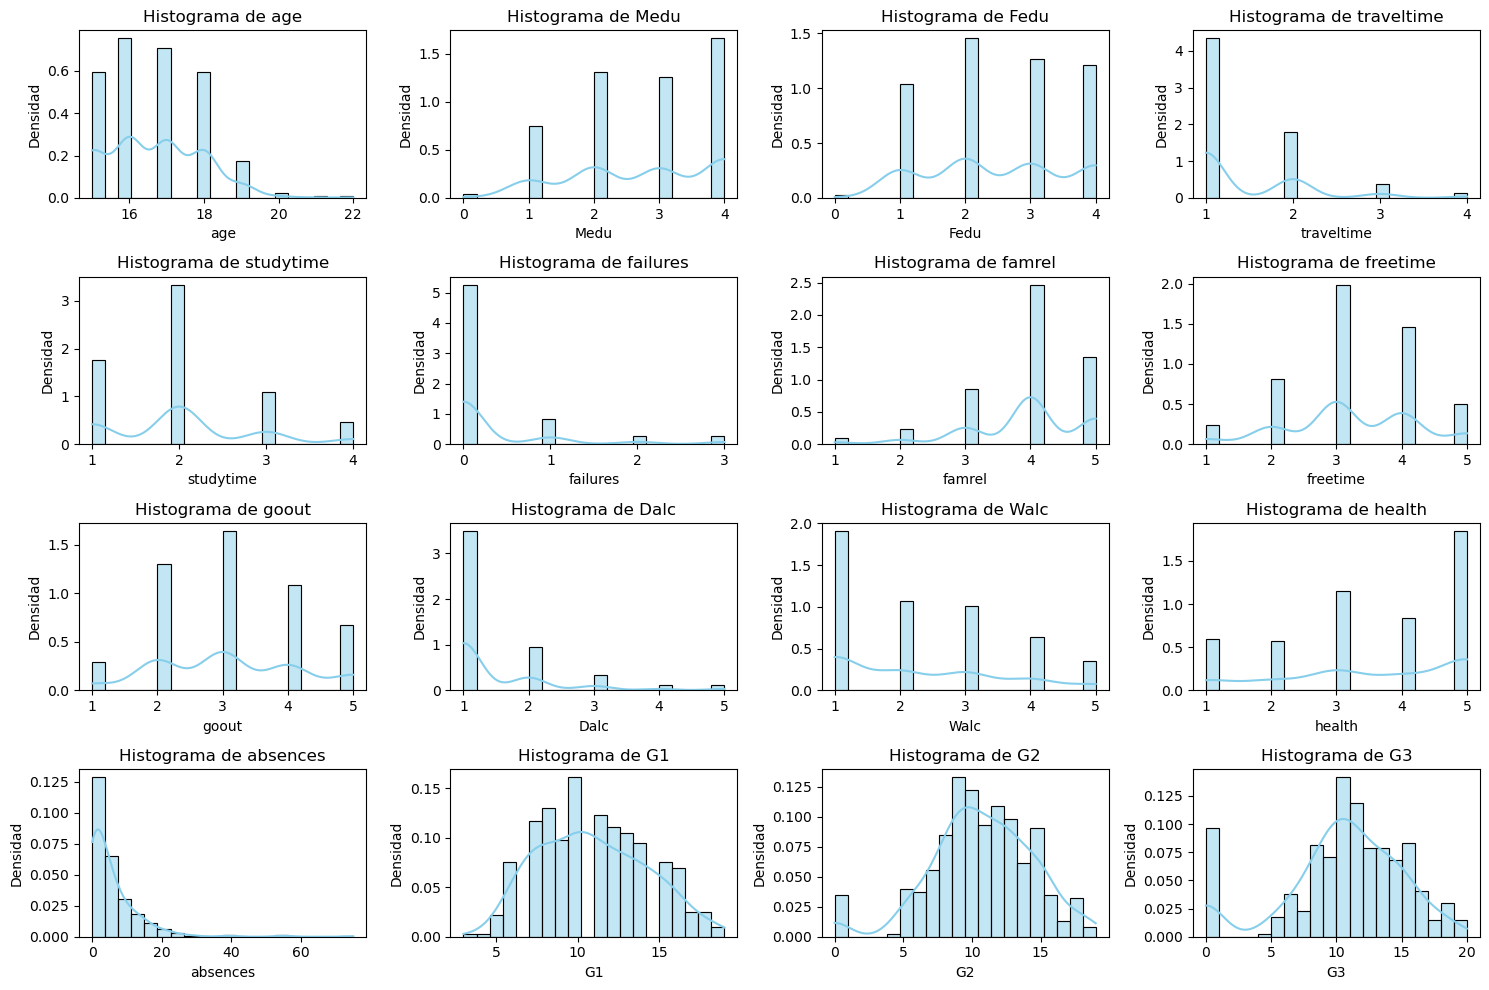

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que el DataFrame se llama df
# Lista de columnas numéricas
numerical_columns = [
    'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 
    'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'
]

# Crear un gráfico de histogramas
plt.figure(figsize=(15, 10))

# Iterar sobre las columnas y crear un histograma por cada una
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)  # Crear una cuadrícula de 4x4 subgráficos
    sns.histplot(df[column], kde=True, bins=20, color='skyblue', stat='density')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Densidad')

plt.tight_layout()
plt.show()



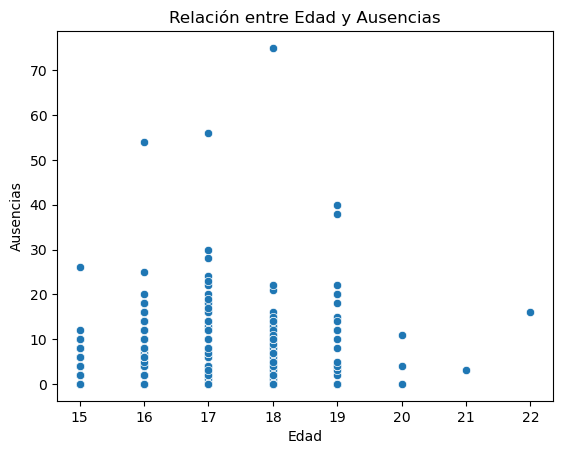

In [6]:
sns.scatterplot(x='age', y='absences', data=df)
plt.title('Relación entre Edad y Ausencias')
plt.xlabel('Edad')
plt.ylabel('Ausencias')
plt.show()



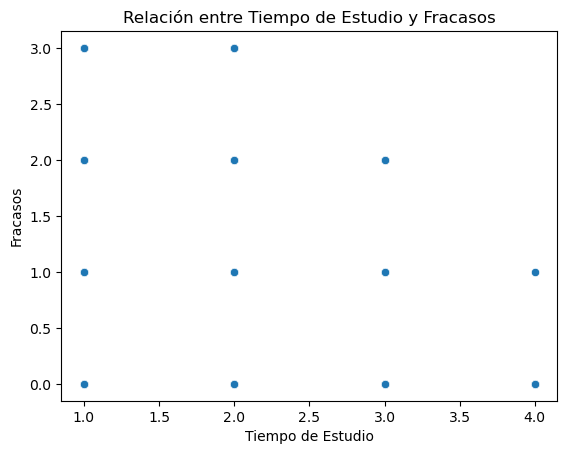

In [7]:
sns.scatterplot(x='studytime', y='failures', data=df)
plt.title('Relación entre Tiempo de Estudio y Fracasos')
plt.xlabel('Tiempo de Estudio')
plt.ylabel('Fracasos')
plt.show()


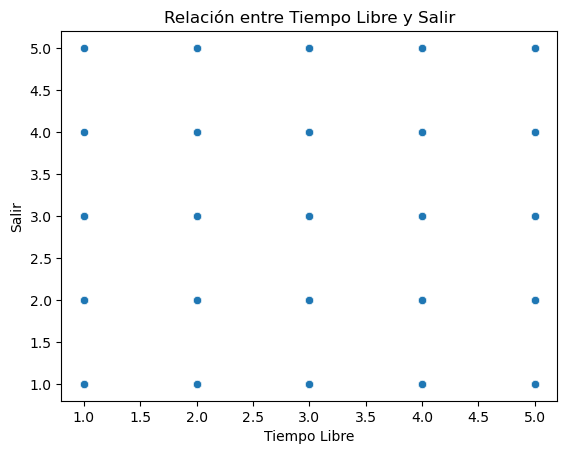

In [8]:
sns.scatterplot(x='freetime', y='goout', data=df)
plt.title('Relación entre Tiempo Libre y Salir')
plt.xlabel('Tiempo Libre')
plt.ylabel('Salir')
plt.show()


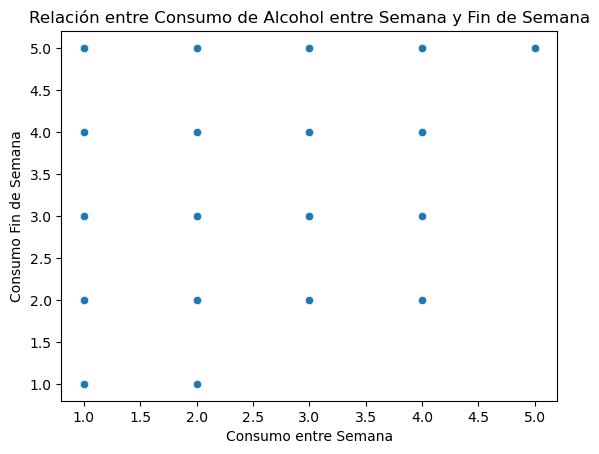

In [9]:
sns.scatterplot(x='Dalc', y='Walc', data=df)
plt.title('Relación entre Consumo de Alcohol entre Semana y Fin de Semana')
plt.xlabel('Consumo entre Semana')
plt.ylabel('Consumo Fin de Semana')
plt.show()


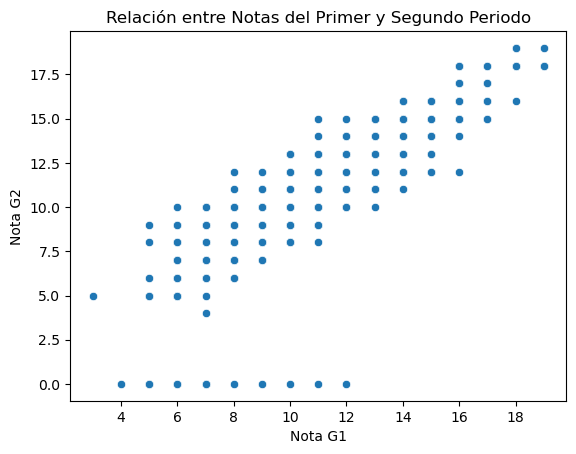

In [10]:
sns.scatterplot(x='G1', y='G2', data=df)
plt.title('Relación entre Notas del Primer y Segundo Periodo')
plt.xlabel('Nota G1')
plt.ylabel('Nota G2')
plt.show()


In [11]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
school,395,0,0.0
paid,395,0,0.0
G2,395,0,0.0
G1,395,0,0.0
absences,395,0,0.0
health,395,0,0.0
Walc,395,0,0.0
Dalc,395,0,0.0
goout,395,0,0.0
freetime,395,0,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [13]:
# Ejemplo: asegurarse de que numerical_df contiene solo columnas numéricas
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculando el IQR para identificar outliers
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1

# Definir límites para detectar outliers
outlier_lower_bound = Q1 - 1.5 * IQR
outlier_upper_bound = Q3 + 1.5 * IQR

# Mostrar los outliers detectados
outliers = ((numerical_df < outlier_lower_bound) | (numerical_df > outlier_upper_bound))

# Contar el número de outliers por columna
outliers_count = outliers.sum()
print("\nNúmero de outliers por columna:")
print(outliers_count)

# (Opcional) Mostrar los registros con outliers si es necesario
print("\nRegistros que contienen outliers:")
print(numerical_df[outliers.any(axis=1)])



Número de outliers por columna:
age            1
Medu           0
Fedu           2
traveltime     8
studytime     27
failures      83
famrel        26
freetime      19
goout          0
Dalc          18
Walc           0
health         0
absences      15
G1             0
G2            13
G3             0
dtype: int64

Registros que contienen outliers:
     age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
2     15     1     1           1          2         3       4         3   
7     17     4     4           2          2         0       4         1   
18    17     3     2           1          1         3       5         5   
19    16     4     3           1          1         0       3         1   
25    16     2     2           1          1         2       1         2   
..   ...   ...   ...         ...        ...       ...     ...       ...   
387   19     2     3           1          3         1       5         4   
389   18     1     1           2          2    

In [14]:
# Identificar las columnas categóricas (tipo 'object')
categorical_columns = df.select_dtypes(include=['object']).columns
print("Columnas Categóricas:", categorical_columns)


Columnas Categóricas: Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


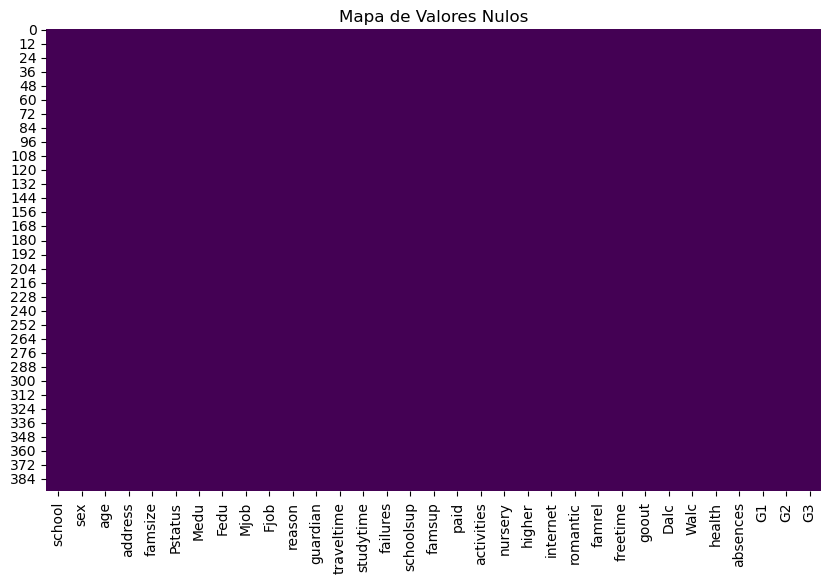

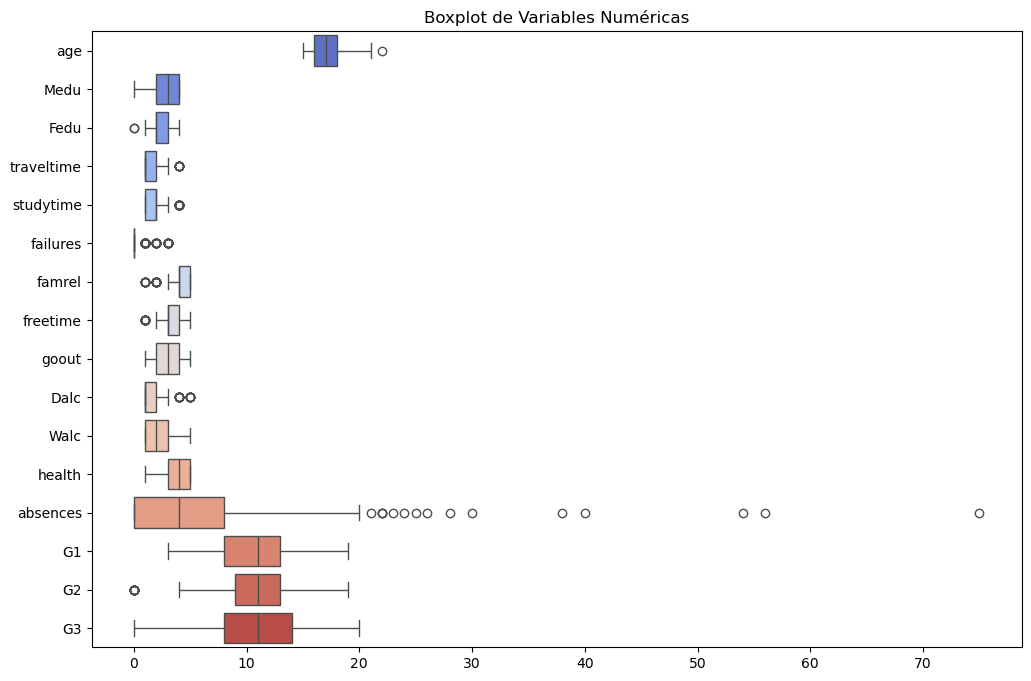

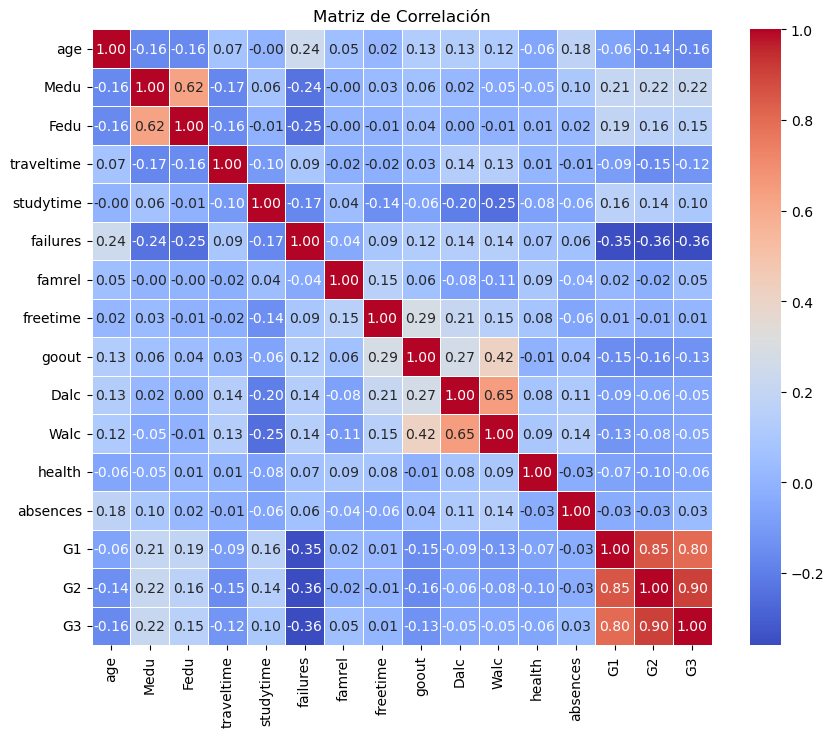

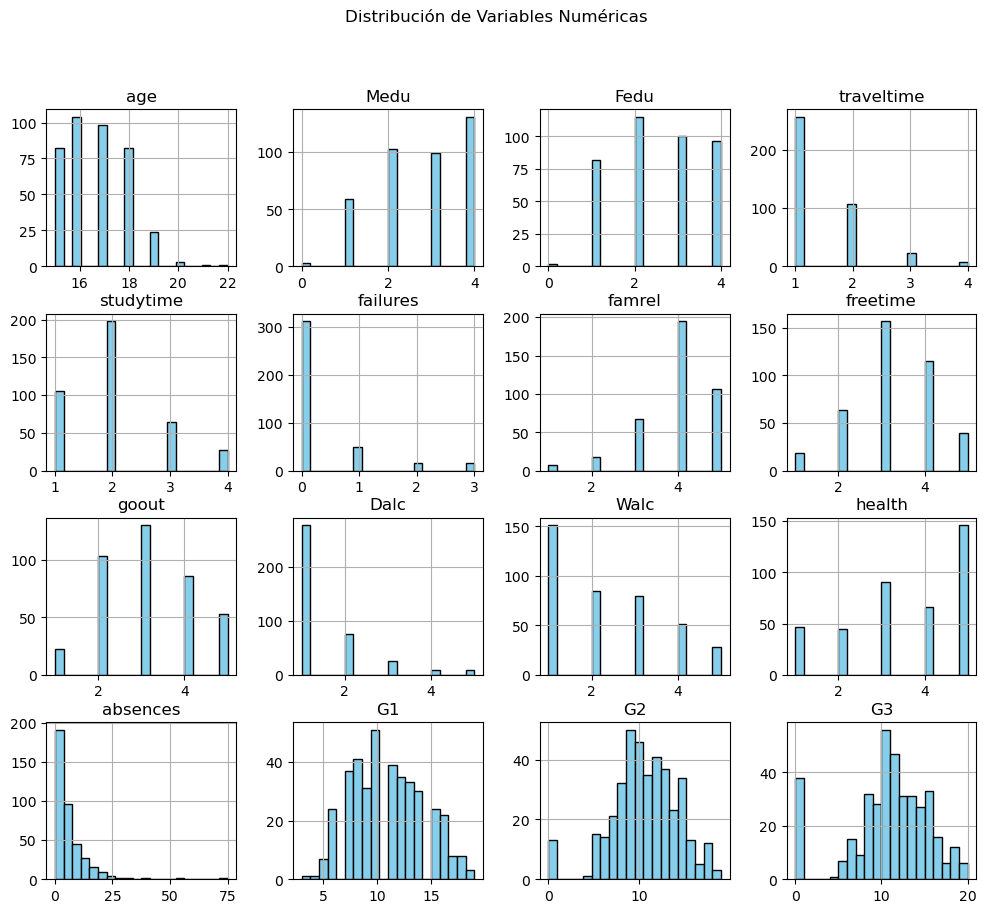

In [15]:
# Visualización de Valores Nulos
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Valores Nulos')
plt.show()

# Identificación de Outliers con Boxplot
# Para encontrar outliers, se crea un boxplot para las columnas numéricas
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_df, orient='h', palette='coolwarm')
plt.title('Boxplot de Variables Numéricas')
plt.show()

# Visualización de la Matriz de Correlación
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# Distribución de Variables Numéricas
# Histograma para cada variable numérica
numerical_df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Distribución de Variables Numéricas')
plt.show()




### **Elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción)**

**Diagnóstico y Selección de Problema**

En este análisis, se trabajará con un conjunto de datos que contiene 395 entradas y 33 columnas. Basado en la inspección inicial del conjunto de datos, se pueden identificar diferentes tipos de variables y la naturaleza de los datos. Ahora, pasemos a un diagnóstico detallado y a la selección de un problema específico que se pueda abordar de forma efectiva.

**Análisis Inicial del Dataset**
El dataset tiene una combinación de variables numéricas y categóricas:

**Variables Numéricas:**
* Edad (age): Edad del estudiante.
* Medu (Nivel educativo de la madre): Nivel educativo de la madre (0 a 4).
* Fedu (Nivel educativo del padre): Nivel educativo del padre (0 a 4).
* Traveltime (Tiempo de viaje al colegio): Tiempo en minutos que el estudiante tarda en llegar al colegio.
* Studytime (Tiempo dedicado al estudio): Tiempo de estudio semanal del estudiante.
* Failures (Número de fracasos escolares): Número de fracasos escolares que ha tenido el estudiante.
* Famrel (Relación familiar): Relación familiar del estudiante (1 a 5).
* Freetime (Tiempo libre): Tiempo libre disponible para el estudiante (1 a 5).
* Goout (Frecuencia de salir con amigos): Frecuencia de salir con amigos (1 a 5).
* Dalc (Consumo de alcohol durante la semana): Consumo de alcohol durante la semana (1 a 5).
* Walc (Consumo de alcohol durante el fin de semana): Consumo de alcohol durante el fin de semana (1 a 5).
* Health (Estado de salud): Estado de salud del estudiante (1 a 5).
* Absences (Número de ausencias): Número de ausencias del estudiante en clases.
* G1, G2, G3 (Notas): Las calificaciones del estudiante en tres trimestres.

**Variables Categóricas:**
* school: Nombre del colegio.
* sex: Sexo del estudiante.
* address: Dirección del estudiante (urbana o rural).
* famsize: Tamaño de la familia (pequeña o grande).
* Pstatus: Estado civil de los padres.
* Mjob, Fjob: Trabajo de la madre y el padre.
* reason: Razón para asistir al colegio.
* guardian: Tutor del estudiante.
* Schoolsup, Famsup, Paid: Si el estudiante tiene apoyo escolar, familiar o clases privadas.
* Activities, Nursery, Higher, Internet, Romantic: Participación en actividades, asistencia a jardín de infantes, acceso a educación superior, acceso a internet y relación romántica.
* Problema Específico a Abordar: Predicción de Notas Finales (Regresión)

Una problemática interesante que se puede abordar con este conjunto de datos es la predicción de las notas finales del estudiante (G3) en función de otras variables. Esto se trataría de un problema de regresión, donde el objetivo es predecir una variable continua (G3) basada en otras variables del conjunto de datos.

**Justificación de la Elección del Problema**

* **Relevancia:**

* **Educación y rendimiento académico:** Predecir el rendimiento académico final de los estudiantes es una tarea de gran relevancia para los sistemas educativos. Esto puede ayudar a identificar a los estudiantes que necesitan más apoyo o intervención en áreas específicas.

**Desempeño académico:** Las variables como el tiempo de estudio, la cantidad de fracasos previos, el consumo de alcohol y las ausencias son indicativos de posibles factores que afectan el rendimiento académico. Un modelo de regresión puede proporcionar una manera precisa de cuantificar la relación entre estos factores y el rendimiento final.

**Desafíos:**

* **Relaciones no lineales:** Muchas de las relaciones entre las variables (como las ausencias o el consumo de alcohol) y las notas pueden no ser lineales. Por lo tanto, se necesitarían técnicas como la regresión lineal múltiple, Random Forest o Gradient Boosting, que puedan capturar estas relaciones.

* **Colinealidad:** Algunas variables pueden estar altamente correlacionadas, lo que podría afectar el rendimiento del modelo. Por ejemplo, las notas G1 y G2 están probablemente correlacionadas, lo que podría influir en la predicción de G3.

* **Manejo de variables categóricas:** Muchas de las variables, como el sexo, el estado civil de los padres o el tipo de escuela, son categóricas y deben ser adecuadamente transformadas para ser incluidas en un modelo de regresión.

**Variables Clave para la Predicción:**

* **Notas previas (G1, G2):** Es muy probable que las notas de los trimestres anteriores sean los mejores predictores para G3. La relación entre estas variables puede ser muy fuerte.
* **Tiempo de estudio (studytime):** El tiempo dedicado al estudio tiene una alta probabilidad de ser un factor relevante para el rendimiento académico.
* **Ausencias (absences):** Las ausencias pueden tener un impacto negativo en las notas finales.
* **Consumo de alcohol (Dalc y Walc):** El consumo de alcohol, especialmente en los fines de semana (Walc), puede estar asociado a un menor rendimiento académico.

**Beneficios de la Solución:**

* La creación de un modelo predictivo permitirá a los administradores escolares y a los educadores identificar a los estudiantes en riesgo de bajo rendimiento y proporcionarles las intervenciones necesarias a tiempo.

* El modelo también podría utilizarse para personalizar los planes de estudio o las intervenciones según las necesidades específicas de cada estudiante.


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder




In [17]:
# Codificar variables categóricas utilizando LabelEncoder
encoder = LabelEncoder()
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 
                       'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

# Aplicar la codificación a las variables categóricas
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

# Revisar si hay valores nulos
print(df.isnull().sum())

# En este caso no hay valores nulos, por lo que no necesitamos hacer imputación


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [18]:
# Características (X) y variable objetivo (y)
X = df.drop(columns=['G3'])  # Eliminar la columna G3 (variable objetivo)
y = df['G3']  # G3 es la variable objetivo


In [19]:
# Dividir los datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [20]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)


LinearRegression()

In [21]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"R²: {r2}")


Error Cuadrático Medio (MSE): 4.511360147828822
R²: 0.7947708519011207


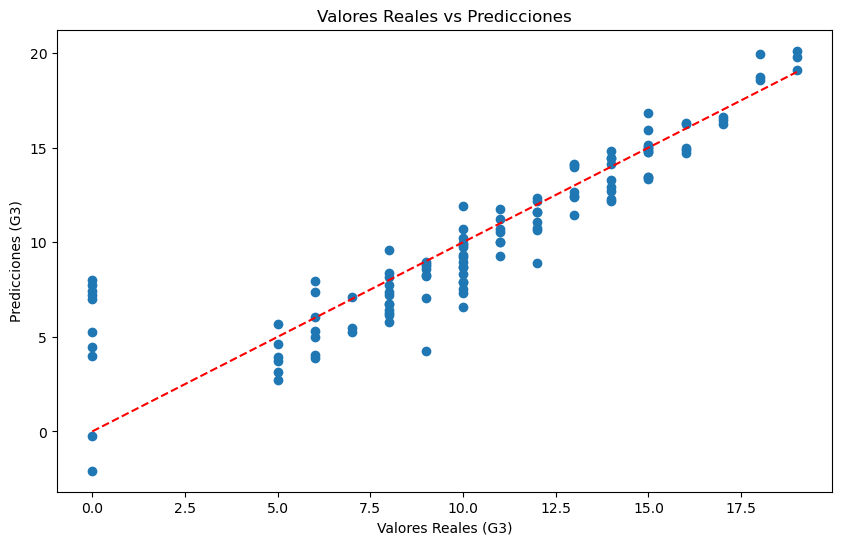

In [22]:
# Graficar los valores reales vs las predicciones
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Valores Reales vs Predicciones')
plt.xlabel('Valores Reales (G3)')
plt.ylabel('Predicciones (G3)')
plt.show()
